<a href="https://colab.research.google.com/github/simaan467/MRI-DETECTION-USING-DIP-AND-ML/blob/main/MRI_Detection_using_DIP_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
# encoding tumor as '0' and no tumor as '1'
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [4]:
#To update list for images having tumor
result = []
paths = []
data = []
# Use a raw string for the path or replace backslashes with forward slashes
for r,d,f in os.walk('/content/drive/MyDrive/brain_tumor_dataset/yes'):
  for file in f:
    # Correct the endswith check
    if file.endswith(".jpg"):
      paths.append(os.path.join(r,file))
for path in paths:
  img = Image.open(path)
  img = img.resize((128,128))
  # Convert image to numpy array
  img = np.array(img)
  if (img.shape == (128,128,3)):
    data.append(img)
    # Append the encoded label for the 'yes' class (tumor)
    result.append(encoder.transform([[0]]).toarray())

In [5]:
# This cell updates result list for images without tumor
paths = []
for r, d, f in os.walk("/content/drive/MyDrive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(img)
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(139,2)

**SPLITTING DATA INTO TRAIN AND TEST**

In [8]:
train_X, test_X, train_Y, test_Y = train_test_split(data,result,test_size = 0.2,shuffle= True,random_state=0)

**MODEL BUILDING**

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [10]:

train_Y.shape

(111, 2)

In [11]:
history = model.fit(train_X,train_Y,epochs = 30,batch_size = 40,verbose = 1,validation_data = (test_X,test_Y))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - loss: 16.3197 - val_loss: 135.2736
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 27.9852 - val_loss: 31.1978
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 9.8325 - val_loss: 27.5843
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 5.8097 - val_loss: 21.7467
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 3.4554 - val_loss: 12.7321
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.3009 - val_loss: 9.0431
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.6898 - val_loss: 8.4031
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 1.0727 - val_loss: 7.7474
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.5027 - val_loss: 6.2700
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.1934 - val_loss: 6.0748
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.4863 - val_loss: 6.2870
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1215 - val_loss: 

**plotting loss**

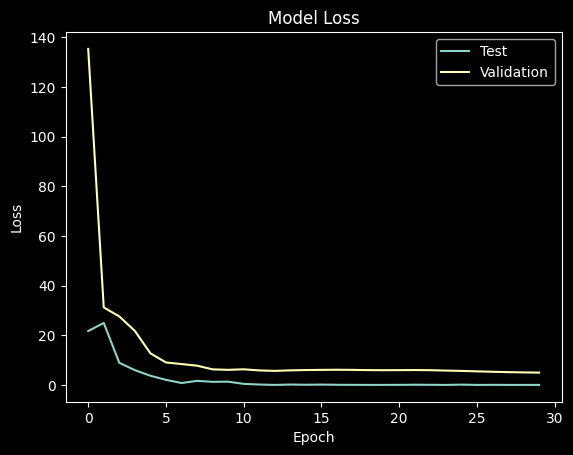

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

Checking the Model

In [13]:
def names(number):
  if number == 0:
    return "It has a Tumor"
  else:
    return "No Tumor symptoms"

99.99991% Classified as It has a Tumor


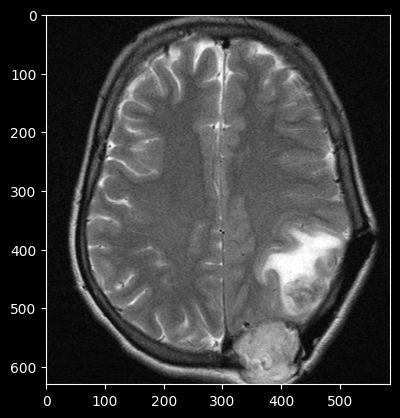

In [16]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/yes/Y102.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Classified as ' + names(classification))

100.0% Classified as No Tumor symptoms


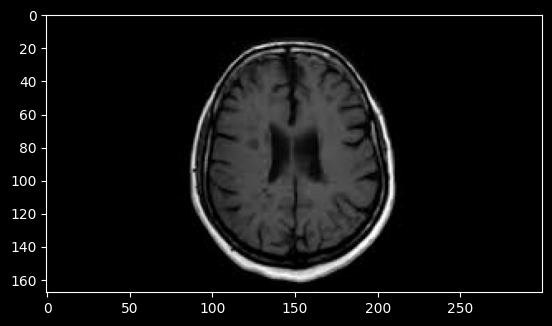

In [17]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/no/11 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Classified as ' + names(classification))
